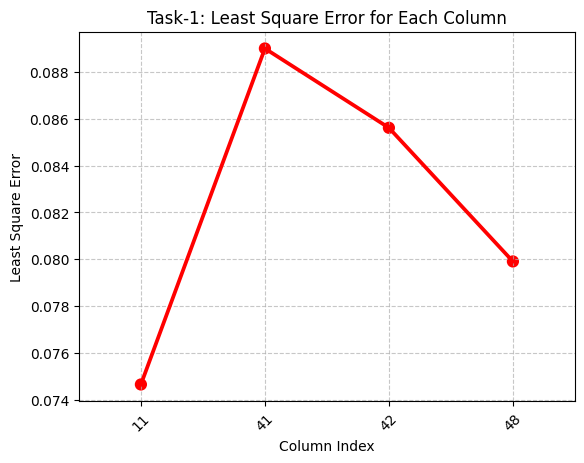

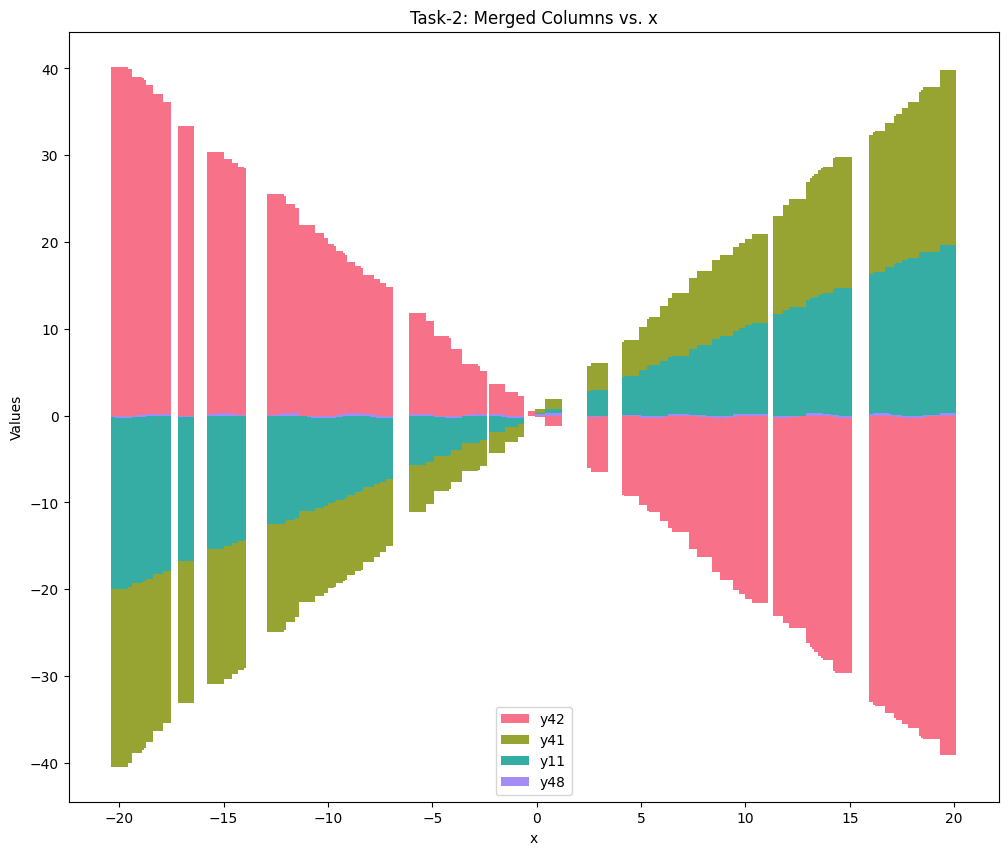

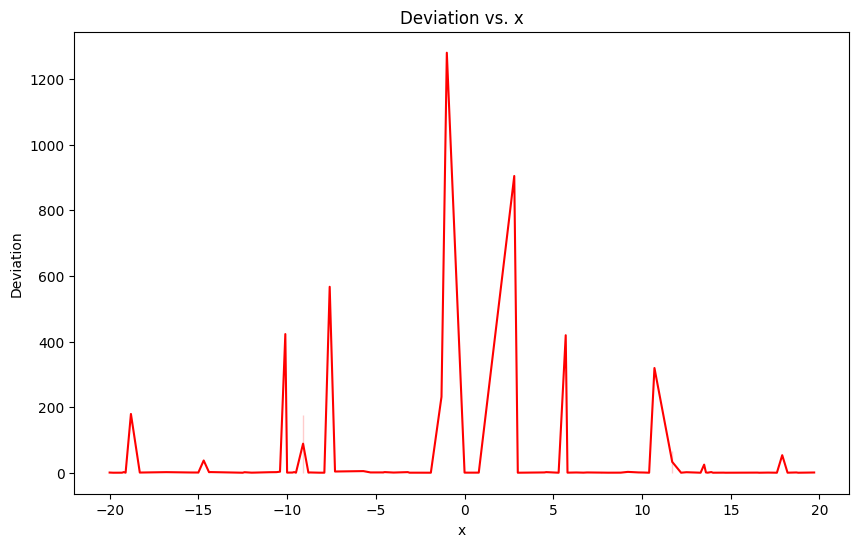

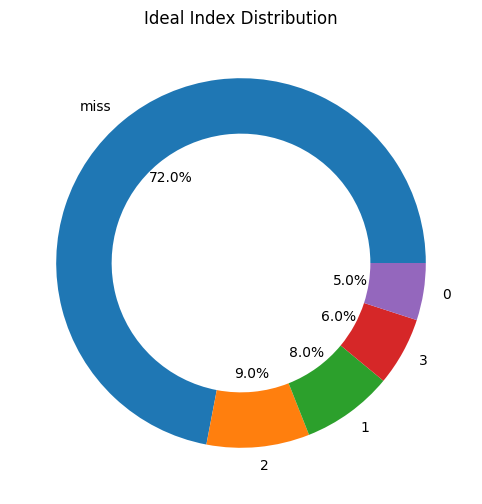

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train = pd.read_excel("Dataset.xlsx", sheet_name="train")
test = pd.read_excel("Dataset.xlsx", sheet_name="test")
ideal = pd.read_excel("Dataset.xlsx", sheet_name="ideal")

# Task-1: Calculate Least Square Error for Each Column
a = []
least_sq = []
for i in range(1, len(train.columns)):
    l_se = []
    for j in range(1, len(ideal.columns)):
        m_se = 0
        for k in range(len(train)):
            ts = train.iloc[k, i]
            il = ideal.iloc[k, j]
            m_se = m_se + ((ts - il) ** 2)
        l_se.append(m_se / len(train))
    minimum = min(l_se)
    index = l_se.index(minimum)
    a.append(index + 1)
    least_sq.append(minimum)

task_1 = pd.DataFrame({"Column_name": a, "leastsq_error": least_sq})

# Task-2: Merge Ideal Functions with Test Data
ideals = []
for i in range(0, len(task_1)):
    ideals.append(ideal[["x", f"y{str(task_1.iloc[i, 0])}"]])

for i in ideals:
    test = test.merge(i, on='x', how='left')

# Calculate Deviation and Ideal Index
id_ind = []
dev = []
for i in range(len(test)):
    mse_li = []
    for j in range(2, len(test.columns)):
        v1 = test.iloc[i, 1]
        v2 = test.iloc[i, j]
        m_se = ((v1 - v2) ** 2)
        mse_li.append(m_se)
    minimum = min(mse_li)

    if minimum < np.sqrt(2) * 0.089005:
        dev.append(minimum)
        index = mse_li.index(minimum)
        id_ind.append(index)
    else:
        dev.append(minimum)
        id_ind.append('miss')

test["Deviation"] = dev
test["Ideal Index"] = id_ind
# Visualization

# Data Visualization

sns.pointplot(data=task_1, x="Column_name", y="leastsq_error", color='red')
plt.title("Task-1: Least Square Error for Each Column")
plt.xlabel("Column Index")
plt.ylabel("Least Square Error")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Task-2 Visualization
# Define a custom color palette
colors = sns.color_palette("husl", len(task_1))

plt.figure(figsize=(12, 10))
for i in range(0, len(task_1)):
    plt.bar(test["x"], test[f"y{task_1.iloc[i, 0]}"], label=f"y{task_1.iloc[i, 0]}", color=colors[i])

plt.legend()
plt.title("Task-2: Merged Columns vs. x")
plt.xlabel("x")
plt.ylabel("Values") 
plt.show()

# Deviation Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=test, x="x", y="Deviation", color='red')  # Change 'red' to the color you prefer
plt.title("Deviation vs. x")
plt.xlabel("x")
plt.ylabel("Deviation")
plt.show()

# Ideal Index Visualization
plt.figure(figsize=(8, 6))
test['Ideal Index'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title("Ideal Index Distribution")
plt.ylabel("")
plt.show()

In [3]:
task_1

,Column_name,leastsq_error
0,42,0.085616
1,41,0.089005
2,11,0.074655
3,48,0.079909


In [4]:
test

,x,y,y42,y41,y11,y48,Deviation,Ideal Index
0,17.5,34.161040,-34.890280,34.512188,17.5,-0.107046,0.123305,1
1,0.3,1.215102,-0.122332,0.747760,0.3,0.141161,0.218409,miss
2,-8.7,-16.843908,17.025677,-17.731485,-8.7,0.248165,0.787793,miss
3,-19.2,-37.170870,38.869610,-38.571660,-19.2,-0.161224,1.962213,miss
4,-11.0,-20.263054,22.002213,-21.500006,-11.0,0.002213,1.530050,miss
...,...,...,...,...,...,...,...,...
95,-1.9,-4.036904,3.638355,-4.273150,-1.9,0.152964,0.055812,1
96,12.2,-0.010358,-23.933184,24.220886,12.2,-0.167227,0.024608,3
97,16.5,-33.964134,-33.351200,32.644108,16.5,0.249978,0.375688,miss
98,5.3,-10.291622,-10.322813,10.183867,5.3,-0.230694,0.000973,0
